# Turkish Super Lig 2021/2022 Analysis

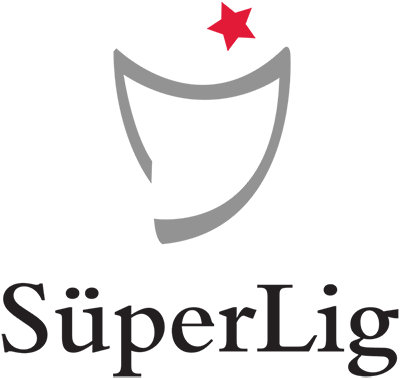

**In this project, I'm going to analyze the 21/22 season of the Turkish Super Lig (TSL). The idea is to find interesting insights about the league, the players, the teams... while using simple stats (age, nationality, goals, minutes played...) of all the players who played in the TSL.**

**The dataset is provided by [FBREF.com](https://fbref.com/en/)  
[Click Here](https://fbref.com/en/comps/26/stats/Super-Lig-Stats#stats_standard) to get access to the table from where I downloaded the data.**

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Loading the players' dataset and showing the first few lines

url = "https://raw.githubusercontent.com/Hamza-Elkadioui/Turkish-Super-Lig-21-22-Analysis/main/Players%20-%20Turkish%20Super%20Lig%2021-22.csv"
players = pd.read_csv(url)
players.head()

,Rk,Player,Nation,Pos,Squad,Age,Born,MP,Starts,Min,...,PK,PKatt,CrdY,CrdR,Gls.1,Ast.1,G+A,G-PK.1,G+A-PK,Matches
0,1,Rayane Aabid\13792bac,fr FRA,MF,Yeni Mal'spor,29.0,1992.0,22,21,1856,...,0,0,3,0,0.05,0.10,0.15,0.05,0.15,Matches
1,2,Rayane Aabid\13792bac,fr FRA,MF,Kasımpaşa,29.0,1992.0,12,5,421,...,0,0,1,0,0.00,0.00,0.00,0.00,0.00,Matches
2,3,Patrick van Aanholt\5f09991f,nl NED,DF,Galatasaray,30.0,1990.0,35,33,2780,...,0,1,3,0,0.06,0.06,0.13,0.06,0.13,Matches
3,4,Sam Adekugbe\7f2309be,ca CAN,DF,Hatayspor,26.0,1995.0,34,34,2927,...,0,0,9,1,0.00,0.06,0.06,0.00,0.06,Matches
4,5,Luiz Adriano\2557c196,br BRA,MFFW,Antalyaspor,34.0,1987.0,15,15,1202,...,0,0,3,0,0.30,0.15,0.45,0.30,0.45,Matches


In [3]:
# Dimensions of players

players.shape

(663, 24)

**This dataset has 663 rows and 24 columns.**

**There are many columns I won't need in my analysis.  
_Even though most of these columns could be useful, I'm trying to drive insights from basic stats._**

In [4]:
# Dropping some columns

players = players.drop(columns = ["Rk", "90s", "Gls.1", "Ast.1",
                                  "G+A", "G-PK.1", "G+A-PK", "Matches"])
players.head()

,Player,Nation,Pos,Squad,Age,Born,MP,Starts,Min,Gls,Ast,G-PK,PK,PKatt,CrdY,CrdR
0,Rayane Aabid\13792bac,fr FRA,MF,Yeni Mal'spor,29.0,1992.0,22,21,1856,1,2,1,0,0,3,0
1,Rayane Aabid\13792bac,fr FRA,MF,Kasımpaşa,29.0,1992.0,12,5,421,0,0,0,0,0,1,0
2,Patrick van Aanholt\5f09991f,nl NED,DF,Galatasaray,30.0,1990.0,35,33,2780,2,2,2,0,1,3,0
3,Sam Adekugbe\7f2309be,ca CAN,DF,Hatayspor,26.0,1995.0,34,34,2927,0,2,0,0,0,9,1
4,Luiz Adriano\2557c196,br BRA,MFFW,Antalyaspor,34.0,1987.0,15,15,1202,4,2,4,0,0,3,0


**For clarity and consistency, the players' columns should be well defined and lowercased.**

In [5]:
# Correcting the players' columns.

corrected_columns = ['player', 'nationality', 'position', 'team', 'age', 'year_born',
                     'matches_played', 'matches_started', 'minutes_played', 'goals', 'assists',
                     'non_penalty_goals', 'penalty_kicks_made', 'penalty_kicks_attempted',
                     'yellow_cards', 'red_cards']
players.columns = corrected_columns
players.head()

,player,nationality,position,team,age,year_born,matches_played,matches_started,minutes_played,goals,assists,non_penalty_goals,penalty_kicks_made,penalty_kicks_attempted,yellow_cards,red_cards
0,Rayane Aabid\13792bac,fr FRA,MF,Yeni Mal'spor,29.0,1992.0,22,21,1856,1,2,1,0,0,3,0
1,Rayane Aabid\13792bac,fr FRA,MF,Kasımpaşa,29.0,1992.0,12,5,421,0,0,0,0,0,1,0
2,Patrick van Aanholt\5f09991f,nl NED,DF,Galatasaray,30.0,1990.0,35,33,2780,2,2,2,0,1,3,0
3,Sam Adekugbe\7f2309be,ca CAN,DF,Hatayspor,26.0,1995.0,34,34,2927,0,2,0,0,0,9,1
4,Luiz Adriano\2557c196,br BRA,MFFW,Antalyaspor,34.0,1987.0,15,15,1202,4,2,4,0,0,3,0


In [6]:
# Checking for null values

players.isna().sum()

player                     0
nationality                2
position                   0
team                       0
age                        2
year_born                  2
matches_played             0
matches_started            0
minutes_played             0
goals                      0
assists                    0
non_penalty_goals          0
penalty_kicks_made         0
penalty_kicks_attempted    0
yellow_cards               0
red_cards                  0
dtype: int64

**The columns _nationality_, _age_, and _year_born_ have 2 null values each.  
It might be that two players don't have any info about their _nationality_, _age_, and _year_born_**

In [7]:
# Checking these players' rows

players[players["age"].isna()]

,player,nationality,position,team,age,year_born,matches_played,matches_started,minutes_played,goals,assists,non_penalty_goals,penalty_kicks_made,penalty_kicks_attempted,yellow_cards,red_cards
8,Harun Akaydin\6b96f0a7,NaN,DF,Kasımpaşa,NaN,NaN,1,1,45,0,0,0,0,0,0,0
272,Izzet Furkan\c96c7daa,NaN,MF,Göztepe,NaN,NaN,3,0,16,0,0,0,0,0,0,0


**As these 2 players played less than a half-game during the whole season. Also, as they didn't register any important stats, I can simply drop them from the analysis without any quality issue.**

In [8]:
# Dropping these players' rows

players.dropna(inplace = True)

In [9]:
# Checking for duplicated values in the players' dataset

players.duplicated().sum()

0

**The dataset doesn't include duplicates.**

In [10]:
# Checking for duplicated values in the player's column

players[players.duplicated("player", keep = False)]

,player,nationality,position,team,age,year_born,matches_played,matches_started,minutes_played,goals,assists,non_penalty_goals,penalty_kicks_made,penalty_kicks_attempted,yellow_cards,red_cards
0,Rayane Aabid\13792bac,fr FRA,MF,Yeni Mal'spor,29.0,1992.0,22,21,1856,1,2,1,0,0,3,0
1,Rayane Aabid\13792bac,fr FRA,MF,Kasımpaşa,29.0,1992.0,12,5,421,0,0,0,0,0,1,0
10,Emre Akbaba\7230b807,tr TUR,MF,Alanyaspor,28.0,1992.0,31,25,2246,10,4,10,0,0,4,0
11,Emre Akbaba\7230b807,tr TUR,MF,Galatasaray,28.0,1992.0,1,0,24,0,0,0,0,0,0,0
24,Eren Albayrak\b02a8b91,tr TUR,DFMF,Antalyaspor,30.0,1991.0,6,0,82,0,0,0,0,0,1,0
25,Eren Albayrak\b02a8b91,tr TUR,DF,Rizespor,30.0,1991.0,11,10,776,0,0,0,0,0,2,0
35,Amilton\28a2c1fe,br BRA,MF,Konyaspor,31.0,1989.0,14,9,645,1,0,1,0,0,2,1
36,Amilton\28a2c1fe,br BRA,MFFW,Antalyaspor,31.0,1989.0,18,11,828,0,0,0,0,0,5,0
94,Andrea Bertolacci\c75b6a02,it ITA,MFFW,Kayserispor,30.0,1991.0,10,7,623,1,0,1,0,0,3,0
95,Andrea Bertolacci\c75b6a02,it ITA,MF,Fatih Karagümrük,30.0,1991.0,15,14,1004,7,1,7,0,0,2,0


**When we check if there are duplicates by _player_ name, we see that we have 29 players.  
Each one of them in two rows but with different teams.  
It's normal as, in the winter transfer window, players can switch teams. And so, play with 2 different teams.**

**The player column has extra numbers and letters alongside the name that I don't need.  
So, I will clean it to leave only the players' names**

In [11]:
# Cleaning the players' names

players['player'] = players['player'].str.split("\\").str.get(0)
players['player'].head(10)

0            Rayane Aabid
1            Rayane Aabid
2     Patrick van Aanholt
3            Sam Adekugbe
4            Luiz Adriano
5        Serhat Ahmetoğlu
6               Serge Aka
7               Eray Akar
9           Samet Akaydın
10            Emre Akbaba
Name: player, dtype: object

**The _nationality_ column is in Alpha-2 code and Alpha-3 code. I will clean it to leave only the nationality's Alpha-3 code.**

In [12]:
# Cleaning the nationality' column

players['nationality'] = players['nationality'].str.split(" ").str.get(1)
players['nationality'].head(10)

0     FRA
1     FRA
2     NED
3     CAN
4     BRA
5     TUR
6     CIV
7     TUR
9     TUR
10    TUR
Name: nationality, dtype: object

In [13]:
# Columns' Datatypes

players.dtypes

player                      object
nationality                 object
position                    object
team                        object
age                        float64
year_born                  float64
matches_played               int64
matches_started              int64
minutes_played               int64
goals                        int64
assists                      int64
non_penalty_goals            int64
penalty_kicks_made           int64
penalty_kicks_attempted      int64
yellow_cards                 int64
red_cards                    int64
dtype: object

**The datatype of the columns _age_ and _year_born_ are floats. They should be integers**

In [14]:
# Changing age and year_born datatype to integer

players = players.astype({"age" : 'int', "year_born" : 'int'})
players.dtypes

player                     object
nationality                object
position                   object
team                       object
age                         int32
year_born                   int32
matches_played              int64
matches_started             int64
minutes_played              int64
goals                       int64
assists                     int64
non_penalty_goals           int64
penalty_kicks_made          int64
penalty_kicks_attempted     int64
yellow_cards                int64
red_cards                   int64
dtype: object

In [15]:
# Number of unique values in each column

players.nunique()

player                     632
nationality                 73
position                     9
team                        20
age                         25
year_born                   24
matches_played              38
matches_started             39
minutes_played             542
goals                       19
assists                     12
non_penalty_goals           16
penalty_kicks_made           7
penalty_kicks_attempted      8
yellow_cards                13
red_cards                    5
dtype: int64

**We can see that in the league, we have:**  
- 20 Teams
- Players representing 73 nationalities...

In [16]:
# A quick statistic summary of the players' dataset

players.describe()

,age,year_born,matches_played,matches_started,minutes_played,goals,assists,non_penalty_goals,penalty_kicks_made,penalty_kicks_attempted,yellow_cards,red_cards
count,661.000000,661.000000,661.000000,661.000000,661.000000,661.000000,661.000000,661.000000,661.000000,661.000000,661.000000,661.000000
mean,26.086233,1994.593041,17.596067,12.644478,1134.183056,1.577912,1.071104,1.388805,0.189107,0.232980,2.431165,0.139183
std,4.962600,4.995987,11.714220,10.956073,948.574764,2.912678,1.807249,2.489699,0.758149,0.865256,2.583197,0.406752
min,15.000000,1981.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,1991.000000,7.000000,2.000000,234.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,1994.000000,18.000000,11.000000,974.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
75%,30.000000,1998.000000,29.000000,22.000000,1898.000000,2.000000,1.000000,2.000000,0.000000,0.000000,4.000000,0.000000
max,40.000000,2005.000000,38.000000,38.000000,3420.000000,20.000000,12.000000,17.000000,8.000000,8.000000,12.000000,4.000000


**There is a lot of insights we can get from this table. For example:**  
- The players' average age is 26 years old.
- The youngest player to ever play during this season was only 15 years old.
- the oldest player has 40 years old.
- Each 1 of 4 players is 30 years old or above.
- In average, each player played 17 games this season.
- In average, each player played 1134 minutes this season.
- The Top goal-scorer of the season registred 20 goals.
- In average, each player scored 1.5 goalsduring the whole season.
- Only 1 of 4 players scored 2 goals or more.
- The Top assist-provider of the season registred 12 assists.
- Only 1 of 4 players provided 1 assist or more.
- The most yellow cards received by a player was 12.
- The most red cards received by a player was 4...

**Now that we have cleaned and prepared the dataset to be analyzed, let's get some insights and answer some questions.**

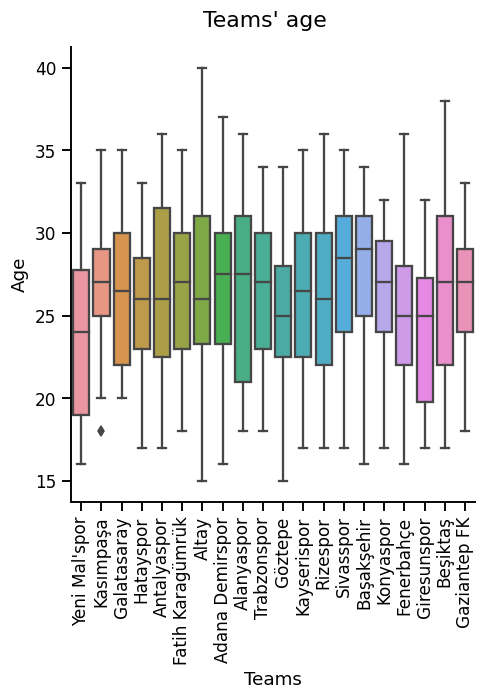

In [17]:
# Plotting a boxplot of teams' age

sns.set_context("notebook")
team_age_boxplot = sns.catplot(x = "team", y = "age", data = players, kind = "box")
team_age_boxplot.fig.suptitle("Teams' age", y = 1.03)
team_age_boxplot.set(xlabel = "Teams", ylabel = "Age")
plt.xticks(rotation = 90)
team_age_boxplot.fig.set_dpi(110)
plt.show()

**In average:**
- Yeni Mal'Spor has the youngest team in the league (around 24 years old).
- The second youngests are Göztepe, Giresunspor, and Fenerbahçe (around 25 years old).
- Başakşehir has the oldest team in the league (around 29 years old).
- The second oldest is Sivasspor (around 28.5 years old).

In [18]:
# Total number of goals scored in the 21-22 season

total_goals = players["goals"].sum()
print("Total number of goals scored in the 21-22 season is: " + str(total_goals))

Total number of goals scored in the 21-22 season is: 1043


In [19]:
# Let's see how many of these scored goals were penalty kicks

total_penalty_kicks_made = players["penalty_kicks_made"].sum()
print("Total number of penalty-kicks scored in the 21-22 season is: " + str(total_penalty_kicks_made))

Total number of penalty-kicks scored in the 21-22 season is: 125


In [20]:
# So, the number of non-penalty goals scored is

total_non_penalty_goals = players["non_penalty_goals"].sum()
print("Total number of non-penalty goals scored in the 21-22 season is: " + str(total_non_penalty_goals))

Total number of non-penalty goals scored in the 21-22 season is: 918


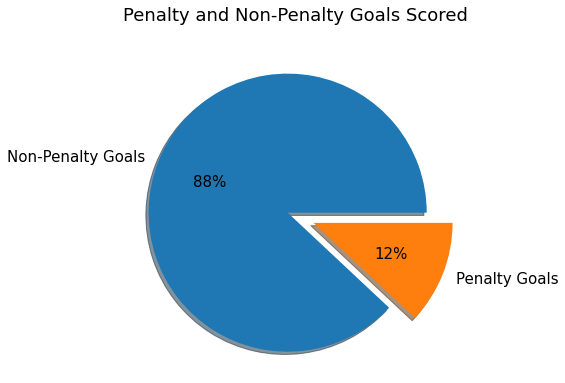

In [21]:
# Plotting the percentages of penalty and non-penalty goals 

sizes = [total_non_penalty_goals, total_penalty_kicks_made]
pie_labels = "Non-Penalty Goals", "Penalty Goals"
pie_explode = (0,0.2)
fig1, ax1 = plt.subplots(figsize=(6,6))
ax1.pie(sizes, explode = pie_explode, labels = pie_labels, shadow = True,
        autopct = "%1.0f%%", textprops={'fontsize': 15})
ax1.axis('equal')
fig1.suptitle('Penalty and Non-Penalty Goals Scored', fontsize=18)
plt.show()

**12% of all goals scored in the 21-22 season were penalty-kicks**

In [22]:
# Total number of assists in the 21-22 season

total_assists = players["assists"].sum()
print("Total number of assists in the 21-22 season is: " + str(total_assists))

Total number of assists in the 21-22 season is: 708


In [23]:
# So, the number of goals scored but not assisted (penalty-kicks, rebounds...)

total_goals_not_assisted = total_goals - total_assists
print("the number of goals scored but not assisted is: " + str(total_goals_not_assisted))

the number of goals scored but not assisted is: 335


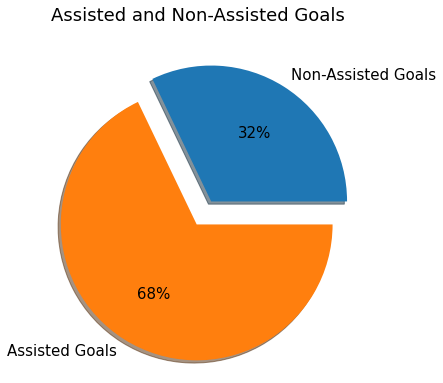

In [24]:
# Plotting the percentages of assisted and non-assisted goals 

sizes_2 = [total_goals_not_assisted, total_assists]
pie_labels_2 = "Non-Assisted Goals", "Assisted Goals"
pie_explode_2 = (0,0.2)
fig2, ax2 = plt.subplots(figsize=(6,6))
ax2.pie(sizes_2, explode = pie_explode_2, labels = pie_labels_2, shadow = True,
        autopct = "%1.0f%%", textprops={'fontsize': 15})
ax2.axis('equal')
fig2.suptitle('Assisted and Non-Assisted Goals', fontsize=18)
plt.show()

**1 of each 3 goals scored in the 21-22 season were not assisted**

In [25]:
# Ranking teams by goals scored

teams_ranked_goals = players.groupby("team")["goals"].sum().sort_values(ascending = False)
teams_ranked_goals

team
Fenerbahçe          73
Trabzonspor         67
Alanyaspor          65
Kasımpaşa           65
Konyaspor           65
Adana Demirspor     58
Beşiktaş            56
Hatayspor           55
Başakşehir          54
Kayserispor         54
Antalyaspor         52
Galatasaray         51
Sivasspor           51
Gaziantep FK        46
Fatih Karagümrük    45
Rizespor            43
Giresunspor         40
Göztepe             39
Altay               38
Yeni Mal'spor       26
Name: goals, dtype: int64

**Even though Fenerbahçe scored more goals than any other team, they finished second in the final points ranking.**

In [26]:
# Top 10 goal-scorers

top_10_goal_scorers = players.groupby("player")["goals"].sum().nlargest(n = 10)
top_10_goal_scorers

player
Umut Bozok           20
Ayoub El Kaabi       18
Mario Balotelli      18
Joel Pohjanpalo      16
Andreas Cornelius    15
Serdar Dursun        15
Aleksandar Pešić     14
Alexandru Maxim      14
Haji Wright          14
Michy Batshuayi      14
Name: goals, dtype: int64

**It looks like being the top scorer was competitive!**

In [27]:
# Top 10 assist-providers

top_10_goal_assist_providers = players.groupby("player")["assists"].sum().nlargest(n = 10)
top_10_goal_assist_providers

player
Edin Višća          12
Efecan Karaca       12
Matías Vargas       12
Anthony Nwakaeme    10
Max Gradel          10
Tayfur Bingöl       10
Mert Yandaş          9
Yunus Akgün          9
João Novais          8
Onur Bulut           8
Name: assists, dtype: int64

**The same as the top-scorer, it looks like being the top assist-provider was competitive!**

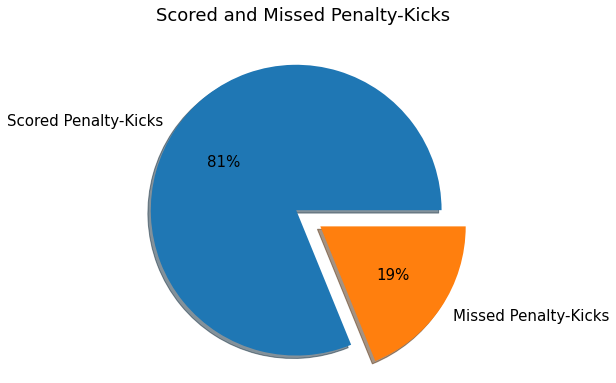

In [28]:
## As I have stats on penalty-kicks scored and those attempted,
# Plotting the success rate of penalty-kicks

Total_penalty_kicks_missed = players["penalty_kicks_attempted"].sum() - total_penalty_kicks_made
sizes_3 = [total_penalty_kicks_made, Total_penalty_kicks_missed]
pie_labels_3 = "Scored Penalty-Kicks", "Missed Penalty-Kicks"
pie_explode_3 = (0,0.2)
fig3, ax3 = plt.subplots(figsize=(6,6))
ax3.pie(sizes_3, explode = pie_explode_3, labels = pie_labels_3, shadow = True,
        autopct = "%1.0f%%", textprops={'fontsize': 15})
ax3.axis('equal')
fig3.suptitle('Scored and Missed Penalty-Kicks', fontsize=18)
plt.show()

**1 of each 5 attempted penalty-kicks was missed**

In [29]:
# The most represented nationalities in the league (by Percentage)

top_10_nationalities = players["nationality"].value_counts(normalize = True).nlargest(n = 10)
rounded_top_10_nationalities = round(top_10_nationalities*100, 1)
top_10_countries = rounded_top_10_nationalities.reset_index().rename(columns = 
                                                                     {"index" : "Country",
                                                                      "nationality" : "Percentage"})
top_10_countries

,Country,Percentage
0,TUR,49.5
1,BRA,4.4
2,FRA,2.6
3,POR,2.4
4,SEN,2.4
5,NGA,2.1
6,BIH,2.1
7,NED,1.7
8,GER,1.7
9,MAR,1.4


**In order to get the full name of each country, I downloaded the complete list of all country ISO codes as described in the ISO 3166 international standard from [iban.com](https://www.iban.com/country-codes). It's in a CSV file.**

In [30]:
# Changing Alpha-3 code to the country name.

url_2 = "https://raw.githubusercontent.com/Hamza-Elkadioui/Turkish-Super-Lig-21-22-Analysis/main/Country%20Codes%20Alpha.csv"
countries = pd.read_csv(url_2)
countries.head()

,Country,Alpha-2 code,Alpha-3 code,Numeric
0,Afghanistan,AF,AFG,4.0
1,Albania,AL,ALB,8.0
2,Algeria,DZ,DZA,12.0
3,American Samoa,AS,ASM,16.0
4,Andorra,AD,AND,20.0


In [31]:
# Merging countries and top_10_countries to get the countries' names

final_top_10_countries = top_10_countries.merge(countries, how = 'inner',
                                                left_on = 'Country', right_on = 'Alpha-3 code')
final_top_10_countries[['Country_y', 'Percentage']]

,Country_y,Percentage
0,Turkey,49.5
1,Brazil,4.4
2,France,2.6
3,Senegal,2.4
4,Nigeria,2.1
5,Bosnia and Herzegovina,2.1
6,Morocco,1.4


**Half of the players in the league are Turkish. The second most represented nationality is Brazil, then France...**

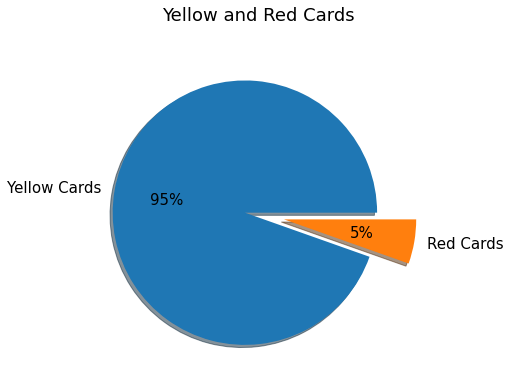

In [32]:
# Checking the percentage of cards (Yellow and Red) 

Total_yellow_cards = players["yellow_cards"].sum()
Total_red_cards = players["red_cards"].sum()
sizes_4 = [Total_yellow_cards, Total_red_cards]
pie_labels_4 = "Yellow Cards", "Red Cards"
pie_explode_4 = (0,0.3)
fig4, ax4 = plt.subplots(figsize=(6,6))
ax4.pie(sizes_4, explode = pie_explode_4, labels = pie_labels_4, shadow = True,
        autopct = "%1.0f%%", textprops={'fontsize': 15})
ax4.axis('equal')
fig4.suptitle('Yellow and Red Cards', fontsize=18)
plt.show()

**Only 5% of all the cards (yellow & red combined) received by players are red.**

In [33]:
# Checking teams' most/least cards receiving

players["total_cards"] = players["yellow_cards"] + players["red_cards"]
teams_cards = players.groupby("team")["total_cards"].sum().sort_values(ascending = False)
teams_cards

team
Beşiktaş            115
Göztepe             103
Kasımpaşa           101
Fatih Karagümrük     94
Hatayspor            93
Galatasaray          92
Fenerbahçe           89
Gaziantep FK         88
Altay                88
Rizespor             87
Yeni Mal'spor        81
Antalyaspor          80
Sivasspor            80
Konyaspor            79
Alanyaspor           76
Kayserispor          76
Başakşehir           75
Trabzonspor          69
Giresunspor          68
Adana Demirspor      65
Name: total_cards, dtype: int64

**Beşiktaş lead the race in terms of cards received by 115 cards!**

In [34]:
# Checking players' most cards receiving

players["total_cards"] = players["yellow_cards"] + players["red_cards"]
teams_cards = players.groupby("player")["total_cards"].sum().nlargest(n = 10)
teams_cards

player
Fabrício Baiano                  14
Obinna Nwobodo                   13
Valentin Rosier                  13
Dino Arslanagic                  12
César Pinares                    11
Jospin Nshimirimana              11
Mario Balotelli                  11
Rúben Tiago Rodrigues Ribeiro    11
Valentin Eysseric                11
İbrahim Akdağ                    11
Name: total_cards, dtype: int64

**It is interesting to see a forward like Mario Balotelli receiving 11 cards and ranking among the top players receiving cards!**

In [35]:
# The unique values in the position column

unique_positions = players["position"].unique()
unique_positions

array(['MF', 'DF', 'MFFW', 'FW', 'GK', 'DFMF', 'FWMF', 'MFDF', 'DFFW'],
      dtype=object)

In [36]:
# Making the position column as category data, then renaming the unique positions to clarify them

players["position"] = players["position"].astype("category")
clarified_positions = {'GK':'Goalkeeper',
                      'DF':'Defender',
                      'DFMF':'Defender/Midfielder',
                      'DFFW':'Defender/Forward',
                      'MFDF':'Midfielder/Defender',
                      'MF':'Midfielder',
                      'MFFW':'Midfielder/Forward',
                      'FWMF':'Forward/Midfielder',
                      'FW':'Forward'
                      }
players["position"] = players["position"].cat.rename_categories(clarified_positions)
players["position"].unique()

['Midfielder', 'Defender', 'Midfielder/Forward', 'Forward', 'Goalkeeper', 'Defender/Midfielder', 'Forward/Midfielder', 'Midfielder/Defender', 'Defender/Forward']
Categories (9, object): ['Defender', 'Defender/Forward', 'Defender/Midfielder', 'Forward', ..., 'Goalkeeper', 'Midfielder', 'Midfielder/Defender', 'Midfielder/Forward']

**In order to keep the _position_ column for a possible more detailed analysis, I will create a new column that aggregates all positions into a simplified version.**

In [37]:
# Creating the new column simplified_positions

conditions = [(players["position"].astype(str).str.startswith("G")),
             (players["position"].astype(str).str.startswith("D")),
             (players["position"].astype(str).str.startswith("M")),
             (players["position"].astype(str).str.startswith("F"))]
values = ["Goalkeeper", "Defender", "Midfielder", "Forward"]
players["simplified_positions"] = np.select(conditions, values)
players["simplified_positions"].unique()

array(['Midfielder', 'Defender', 'Forward', 'Goalkeeper'], dtype=object)

In [38]:
# Making the simplified_positions column as category data

players["simplified_positions"] = players["simplified_positions"].astype("category")

**As to keep the columns organized and easy to access and compare, I'll reorder the columns to get _simplified_positions_ right after _position_.**

In [39]:
# Getting the columns' names as a list

cols = list(players.columns.values)
cols

['player',
 'nationality',
 'position',
 'team',
 'age',
 'year_born',
 'matches_played',
 'matches_started',
 'minutes_played',
 'goals',
 'assists',
 'non_penalty_goals',
 'penalty_kicks_made',
 'penalty_kicks_attempted',
 'yellow_cards',
 'red_cards',
 'total_cards',
 'simplified_positions']

In [40]:
# Reordering the columns to get simplified_positions right after position

players = players[['player',
 'nationality',
 'position', 'simplified_positions', 
 'team',
 'age',
 'year_born',
 'matches_played',
 'matches_started',
 'minutes_played',
 'goals',
 'assists',
 'non_penalty_goals',
 'penalty_kicks_made',
 'penalty_kicks_attempted',
 'yellow_cards',
 'red_cards',
 'total_cards']]

In [41]:
# The percentage of players in each position

pct_players_position = round((players["simplified_positions"].value_counts(
    normalize = True)*100)).astype(int).sort_values(ascending = False)
pct_players_position

Midfielder    44
Defender      33
Forward       15
Goalkeeper     8
Name: simplified_positions, dtype: int32

**Almost half the players in the league are midfielders (44%).**

In [42]:
# The average age in each simplified_positions

position_avg_age = round(players.groupby("simplified_positions")["age"].mean(), 1)
position_avg_age

simplified_positions
Defender      26.2
Forward       26.3
Goalkeeper    26.0
Midfielder    26.0
Name: age, dtype: float64

**The average age in each position is the same (26 years old).**

In [43]:
# The percentage of total goals scored by players in each position

position_total_goals = players.groupby("simplified_positions")["goals"].sum()
pct_position_total_goals = round(100 * position_total_goals /
                                 position_total_goals.sum()).astype(int).sort_values(ascending = False)
pct_position_total_goals

simplified_positions
Midfielder    53
Forward       37
Defender      11
Goalkeeper     0
Name: goals, dtype: int32

**More than half the total goals scored are by midfielders (53%) followed by forwards (37%), then defenders (11%).**

In [44]:
# The percentage of total assists by players in each position

position_total_assists = players.groupby("simplified_positions")["assists"].sum()
pct_position_total_assists = round(100 * position_total_assists /
                                 position_total_assists.sum()).astype(int).sort_values(ascending = False)
pct_position_total_assists

simplified_positions
Midfielder    62
Defender      23
Forward       15
Goalkeeper     0
Name: assists, dtype: int32

**62% of total assists are by midfielders, followed this time by defenders (23%), then by forwards (15%).**

In [45]:
# The percentage of total cards received by players in each position

position_total_cards = players.groupby("simplified_positions")["total_cards"].sum()
pct_position_total_cards = round(100 * position_total_cards /
                                 position_total_cards.sum()).astype(int).sort_values(ascending = False)
pct_position_total_cards

simplified_positions
Midfielder    46
Defender      40
Forward       10
Goalkeeper     4
Name: total_cards, dtype: int32

**We would think that defenders receive more cards than any other position. But here, midfielders received more cards (46%) than defenders (40%).**

**In order to analyze the dataset comparing between Turkish and Not-Turkish players, I will create a new column _is_turkish_ that categorizes players as Turkish or Not-Turkish.**

In [60]:
# Creating a new column that categorizes players as Turkish or Not-Turkish

conditions = [(players["nationality"] == "TUR"), 
              (players["nationality"] != "TUR")]
values = ["Turkish", "Not_Turkish"]
players["is_turkish"] = np.select(conditions, values)
players["is_turkish"].unique()

array(['Not_Turkish', 'Turkish'], dtype=object)

In [61]:
# Making the is_turkish column as category data

players["is_turkish"] = players["is_turkish"].astype("category")

In [48]:
# Getting the columns' names as a list

cols = list(players.columns.values)
cols

['player',
 'nationality',
 'position',
 'simplified_positions',
 'team',
 'age',
 'year_born',
 'matches_played',
 'matches_started',
 'minutes_played',
 'goals',
 'assists',
 'non_penalty_goals',
 'penalty_kicks_made',
 'penalty_kicks_attempted',
 'yellow_cards',
 'red_cards',
 'total_cards',
 'is_turkish']

In [49]:
# Reordering the columns to get is_turkish right after nationality

players = players[['player',
 'nationality', 'is_turkish',
 'position',
 'simplified_positions',
 'team',
 'age',
 'year_born',
 'matches_played',
 'matches_started',
 'minutes_played',
 'goals',
 'assists',
 'non_penalty_goals',
 'penalty_kicks_made',
 'penalty_kicks_attempted',
 'yellow_cards',
 'red_cards',
 'total_cards']]

**Now, we can compare Turkish and Not-Turkish players in terms of (goals, assists, cards received...)**

In [50]:
# The percentage of Turkish and Not-Turkish players

pct_is_turkish = round((players["is_turkish"].value_counts(
    normalize = True)*100)).astype(int).sort_values(ascending = False)
pct_is_turkish

Not_Turkish    51
Turkish        49
Name: is_turkish, dtype: int32

**Half the players are Turkish, while the other half aren't Turkish.**

In [51]:
# The average age for Turkish and Not-Turkish players

is_turkish_avg_age = round(players.groupby("is_turkish")["age"].mean(), 1)
is_turkish_avg_age

is_turkish
Not_Turkish    27.7
Turkish        24.5
Name: age, dtype: float64

**In average, Not_Turkish players are 3 years older than Turkish players.**

In [52]:
# The percentage of total minutes played by Turkish and Not-Turkish players

is_turkish_total_minutes_played = players.groupby("is_turkish")["minutes_played"].sum()
pct_is_turkish_total_minutes_played = round(100 * is_turkish_total_minutes_played /
                                 is_turkish_total_minutes_played.sum()).astype(int).sort_values(ascending = False)
pct_is_turkish_total_minutes_played

is_turkish
Not_Turkish    62
Turkish        38
Name: minutes_played, dtype: int32

**Of all the minutes played during the season, Not_Turkish players played 62% of them!**

In [53]:
# The percentage of total matches played by Turkish and Not-Turkish players

is_turkish_total_matches_played = players.groupby("is_turkish")["matches_played"].sum()
pct_is_turkish_total_matches_played = round(100 * is_turkish_total_matches_played /
                                 is_turkish_total_matches_played.sum()).astype(int).sort_values(ascending = False)
pct_is_turkish_total_matches_played

is_turkish
Not_Turkish    60
Turkish        40
Name: matches_played, dtype: int32

**Of all the matches played during the season, Not_Turkish players played 60% of them!**

In [54]:
# The percentage of total matches started by Turkish and Not-Turkish players

is_turkish_total_matches_started = players.groupby("is_turkish")["matches_started"].sum()
pct_is_turkish_total_matches_started = round(100 * is_turkish_total_matches_started /
                                 is_turkish_total_matches_started.sum()).astype(int).sort_values(ascending = False)
pct_is_turkish_total_matches_started

is_turkish
Not_Turkish    62
Turkish        38
Name: matches_started, dtype: int32

**Generally, Not_Turkish players starts more matches (62% of them) than the Turkish ones!**

In [55]:
# The percentage of total goals scored by Turkish and Not-Turkish players

is_turkish_total_goals = players.groupby("is_turkish")["goals"].sum()
pct_is_turkish_total_goals = round(100 * is_turkish_total_goals /
                                 is_turkish_total_goals.sum()).astype(int).sort_values(ascending = False)
pct_is_turkish_total_goals

is_turkish
Not_Turkish    74
Turkish        26
Name: goals, dtype: int32

**3 of each 4 goals scored were by Not-Turkish players.**

In [56]:
# The percentage of total assists by Turkish and Not-Turkish players

is_turkish_total_assists = players.groupby("is_turkish")["assists"].sum()
pct_is_turkish_total_assists = round(100 * is_turkish_total_assists /
                                 is_turkish_total_assists.sum()).astype(int).sort_values(ascending = False)
pct_is_turkish_total_assists

is_turkish
Not_Turkish    63
Turkish        37
Name: assists, dtype: int32

**2 of each 3 assists were provided by Not-Turkish players.**

In [57]:
# The percentage of total cards received by Turkish and Not-Turkish players

is_turkish_total_cards = players.groupby("is_turkish")["total_cards"].sum()
pct_is_turkish_total_cards = round(100 * is_turkish_total_cards /
                                 is_turkish_total_cards.sum()).astype(int).sort_values(ascending = False)
pct_is_turkish_total_cards

is_turkish
Not_Turkish    63
Turkish        37
Name: total_cards, dtype: int32

**Not-Turkish players receive more cards (63%) than Turkish players (37%).**

In [58]:
# The distribution of Turkish and Not-Turkish players by positions

is_turkish_simplified_positions = pd.crosstab(players["simplified_positions"], players["is_turkish"])
is_turkish_simplified_positions

is_turkish,Not_Turkish,Turkish
simplified_positions,,
Defender,92,124
Forward,61,39
Goalkeeper,14,42
Midfielder,167,122


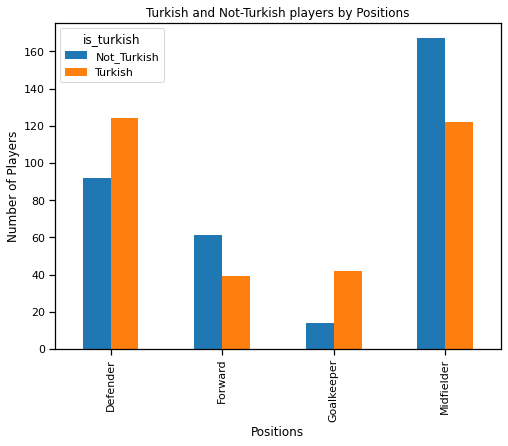

In [59]:
# Plotting the distribution of Turkish and Not-Turkish players by positions

is_turkish_simplified_positions.plot(kind = "bar",
                                     title = "Turkish and Not-Turkish players by Positions",
                                    xlabel = "Positions",
                                    ylabel = "Number of Players",
                                    figsize = (8, 6))
plt.show()

**There is more Turkish players playing as goalkeepers or defenders than the Not-Turkish players.   
In the other hand, There is more Not-Turkish players playing as midfielders or forwards than the Turkish players.**